In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("superstore.csv",encoding='unicode_escape')

In [3]:
data.shape

(51290, 24)

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
data.drop(['Row ID','Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 
         'Product ID','Category', 'Sub-Category','Order ID','Customer ID','Market','Product Name','Order Priority'], 
          axis=1, inplace=True)
data.columns = ['Sales', 'Quantity', 'Discount', 'Profit','Shipping Cost']

In [11]:
data.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
0,408.300,2,0.0,106.140,35.46
1,120.366,3,0.1,36.036,9.72
2,66.120,4,0.0,29.640,8.17
3,44.865,3,0.5,-26.055,4.82
4,113.670,5,0.1,37.770,4.70


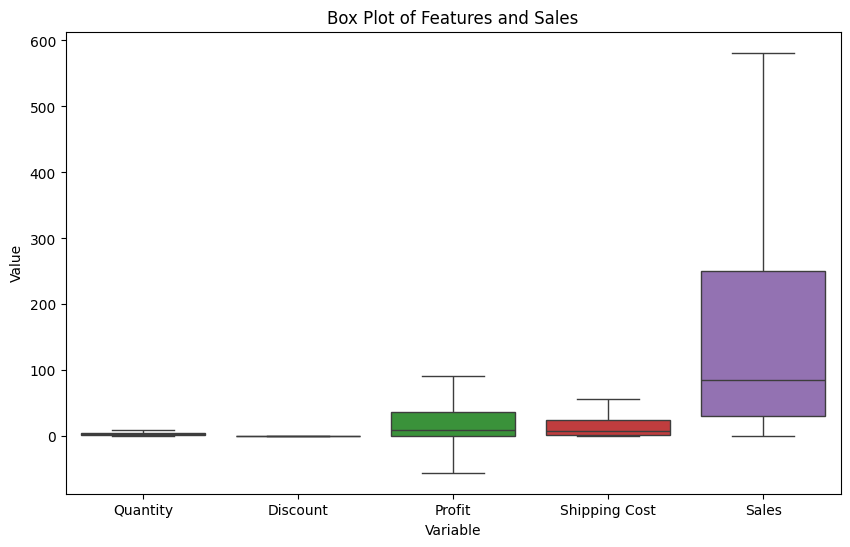

In [12]:
features = data[['Quantity', 'Discount', 'Profit', 'Shipping Cost']]
target = data['Sales']

combined_data = pd.concat([features, target], axis=1)
target = data['Sales']

combined_data = pd.concat([features, target], axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(combined_data), hue='variable', showfliers=False)
plt.title('Box Plot of Features and Sales')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()



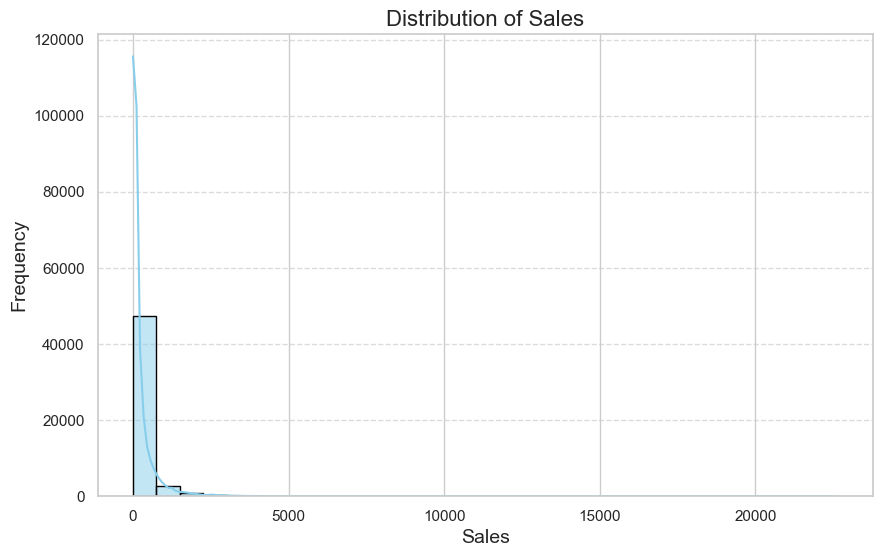

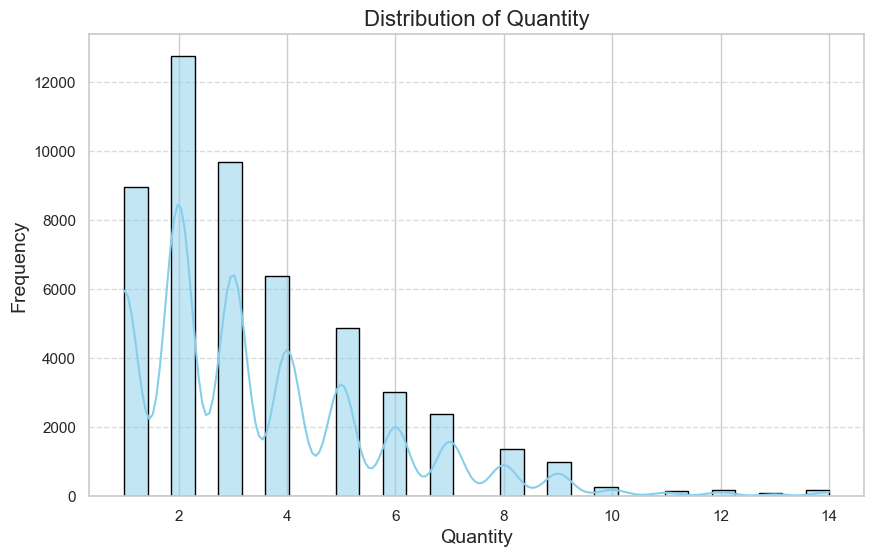

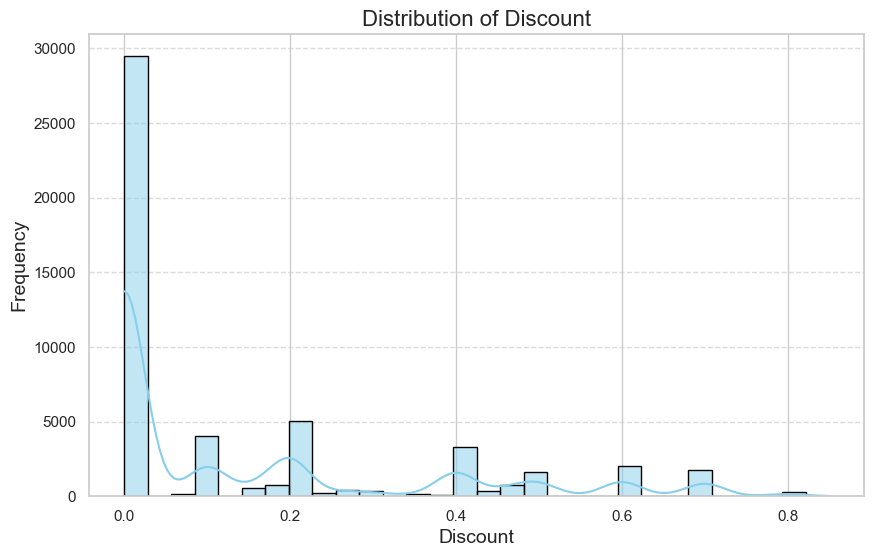

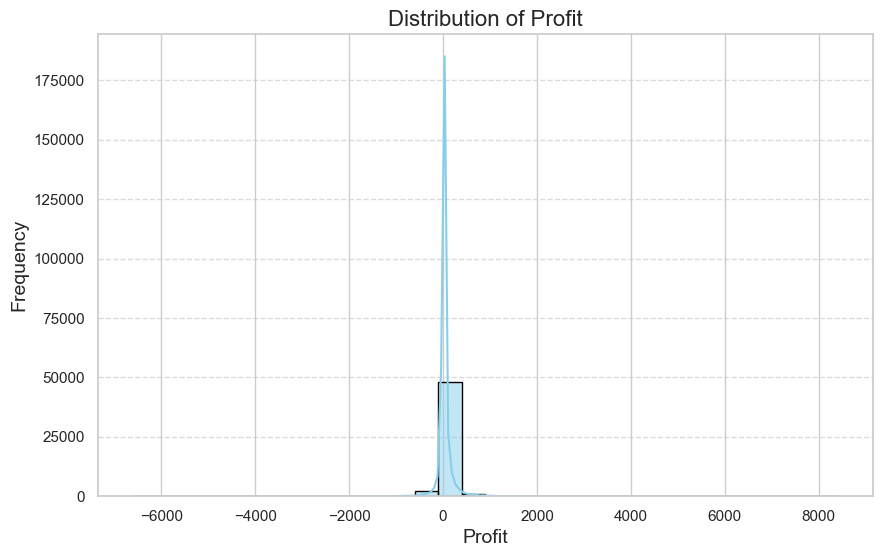

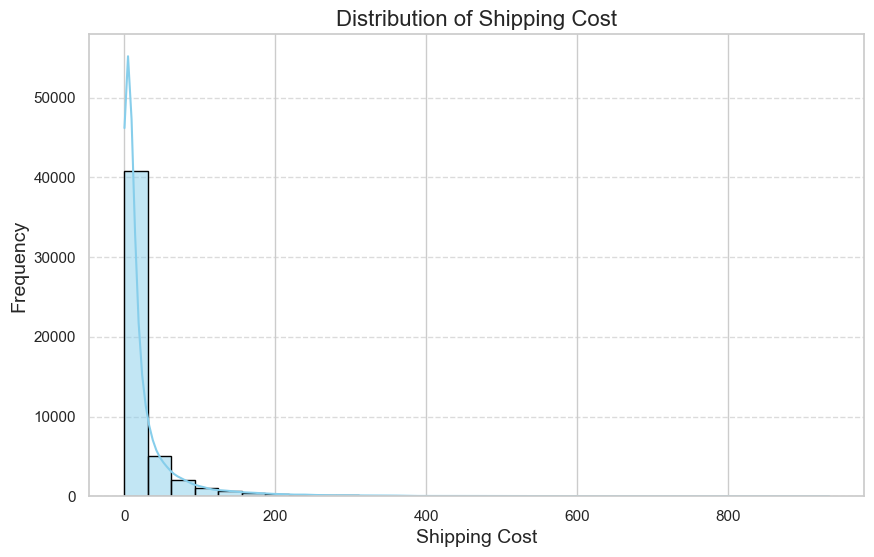

In [13]:
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit','Shipping Cost']
sns.set(style="whitegrid")
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True, color='skyblue', edgecolor='black')
    
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

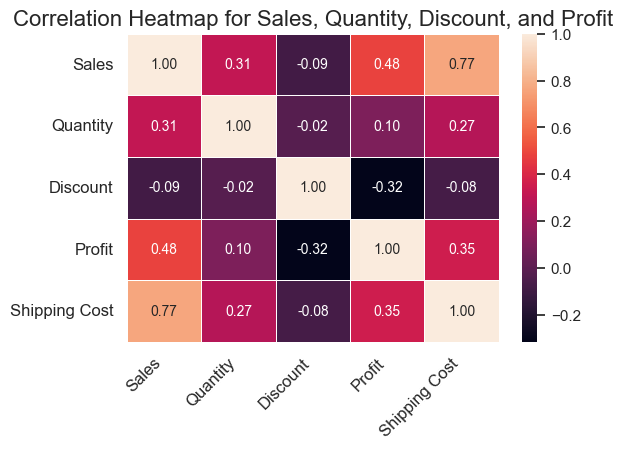

In [14]:
plt.figure(figsize=(6, 4))
sns.set_theme(style="whitegrid", font_scale=1.0)
heatmap_data = data[['Sales', 'Quantity', 'Discount', 'Profit','Shipping Cost']]
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 10})

plt.title("Correlation Heatmap for Sales, Quantity, Discount, and Profit", fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
plt.show()

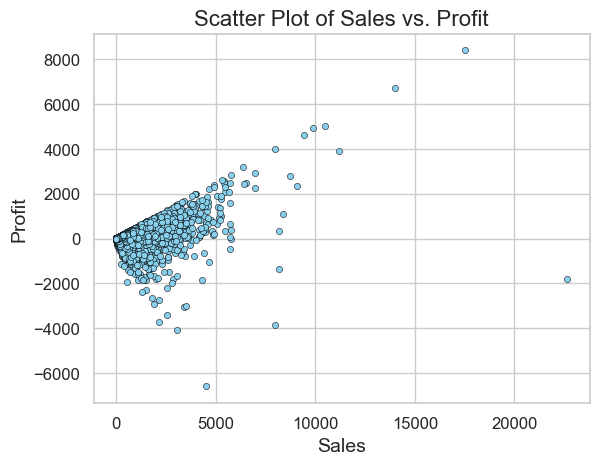

In [15]:
sns.set_theme(style="whitegrid", font_scale=1.2)
scatter_data = data[['Sales', 'Profit']]
scatter = sns.scatterplot(x='Sales', y='Profit', data=scatter_data, s=20, color='skyblue', edgecolor='black')

plt.title("Scatter Plot of Sales vs. Profit", fontsize=16)
plt.xlabel("Sales", fontsize=14)
plt.ylabel("Profit", fontsize=14)

scatter.tick_params(axis='both', labelsize=12)
plt.show()

In [16]:
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [17]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_data.drop(['Sales'], axis=1),train_data['Sales'])

RandomForestRegressor(random_state=42)

In [18]:
predictions = rf.predict(test_data.drop(['Sales'], axis=1))
rmse = ((predictions - test_data['Sales']) ** 2).mean() ** 0.5
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print(predictions)

Root Mean Squared Error: 286.74
[21.054584 23.50052  24.494081 ... 30.1789    4.0271    7.844104]


In [19]:
result_df = pd.DataFrame({
    'Actual Sales': test_data['Sales'],
    'Predicted Sales': predictions,
    'Profit': test_data['Profit'],
    'Discount': test_data['Discount'],
    'Quantity': test_data['Quantity'],
    'Shipping Cost': test_data['Shipping Cost'],
    
})
print(result_df)

       Actual Sales  Predicted Sales   Profit  Discount  Quantity  \
41032        21.744        21.054584   6.7950       0.2         3   
41033        25.173        23.500520 -43.6470       0.7         1   
41034        21.978        24.494081 -40.3020       0.7         1   
41035        12.348        17.264250 -16.9320       0.7         4   
41036        18.528        16.280211  -8.3520       0.4         2   
...             ...              ...      ...       ...       ...   
51285        13.904        16.934060   4.5188       0.2         2   
51286         3.990         5.038650   0.4200       0.0         1   
51287        26.400        30.178900  12.3600       0.0         3   
51288         7.120         4.027100   0.5600       0.0         1   
51289         3.024         7.844104  -0.6048       0.2         3   

       Shipping Cost  
41032           1.69  
41033           1.63  
41034           1.39  
41035           1.36  
41036           1.11  
...              ...  
51285     

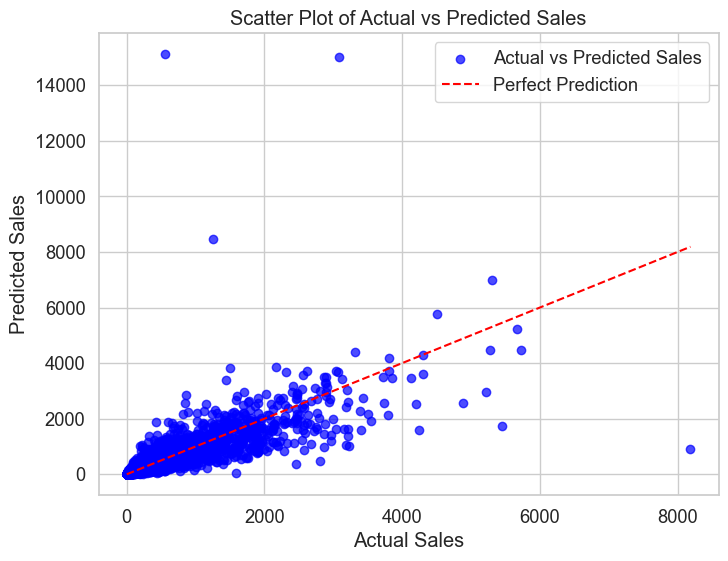

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Sales'], predictions, alpha=0.7, color='blue', label='Actual vs Predicted Sales')
plt.plot([min(test_data['Sales']), max(test_data['Sales'])], [min(test_data['Sales']), max(test_data['Sales'])],
         linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Scatter Plot of Actual vs Predicted Sales')
plt.legend()
plt.show()

In [26]:
single_prediction_data = pd.DataFrame({
    'Quantity': [5],
    'Discount': [0.1],
    'Profit': [37.770],
    'Shipping Cost':[4.70],
})
# 3.024	3	0.2	-0.6048	0.17
# 13.904	2	0.2	4.5188	0.89
# 22255	113.670	5	0.1		37.770 4.70
#13.904	2	0.2	4.5188	0.89
#26.400	3	0.0	12.3600	0.35
# Predict the sales value for the single set of features
single_prediction = rf.predict(single_prediction_data)

print("Predicted Sales Value:")
print(single_prediction)


Predicted Sales Value:
[117.990468]
